In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # For Plotly Express, which is easy-to-use for quick visualizations
import plotly.graph_objects as go 

In [102]:
housing = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=0)
housing.index = ['Housing'] * len(housing)
housing

,Unnamed: 0,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76


In [9]:
rental = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=1)
rental.index = ['Rental'] * len(rental)
rental

,Unnamed: 0,2019,2020,2021,2022,2023
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10


In [11]:
income = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=2)
income.index = ['Income'] * len(income)
income

,Unnamed: 0,2019,2020,2021,2022,2023
Income,DE,26105,29896,29106,28569,30308
Income,FR,26210,25382,26075,26419,27577
Income,PT,11786,12696,13113,13148,14368


In [13]:
final_df = pd.concat([housing, rental, income], ignore_index=True)
index_labels = ['Housing'] * len(housing) + ['Rental'] * len(rental) + ['Income'] * len(income)
final_df.index = index_labels

In [15]:
final_df.rename(columns={"Unnamed: 0": "Country"}, inplace=True)
final_df

,Country,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10
Income,DE,26105.00,29896.00,29106.00,28569.00,30308.00
Income,FR,26210.00,25382.00,26075.00,26419.00,27577.00
Income,PT,11786.00,12696.00,13113.00,13148.00,14368.00


In [18]:
income_df = final_df[final_df.index == 'Income']
income_df

,Country,2019,2020,2021,2022,2023
Income,DE,26105.0,29896.0,29106.0,28569.0,30308.0
Income,FR,26210.0,25382.0,26075.0,26419.0,27577.0
Income,PT,11786.0,12696.0,13113.0,13148.0,14368.0


In [19]:
income_tidy = income_df.melt(id_vars="Country", var_name="Year", value_name="Income")
income_tidy

,Country,Year,Income
0,DE,2019,26105.0
1,FR,2019,26210.0
2,PT,2019,11786.0
3,DE,2020,29896.0
4,FR,2020,25382.0
5,PT,2020,12696.0
6,DE,2021,29106.0
7,FR,2021,26075.0
8,PT,2021,13113.0
9,DE,2022,28569.0


<Axes: xlabel='Year', ylabel='Income'>

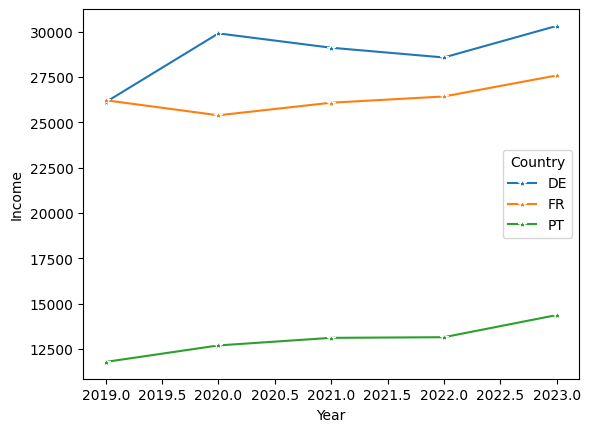

In [20]:
sns.lineplot(data=income_tidy, x="Year", y="Income", hue="Country", marker="*")

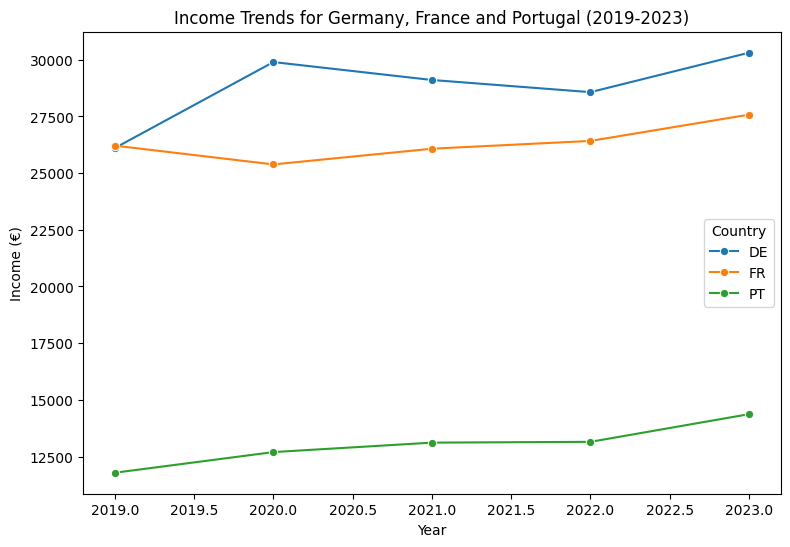

In [21]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=income_tidy, x="Year", y="Income", hue="Country", marker="o")
plt.title("Income Trends for Germany, France and Portugal (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Income (€)")
plt.show()

In [37]:
cities = pd.read_excel("../data/raw/numbeo_stats.xlsx", sheet_name=0)
cities

,Unnamed: 0,City,2019,2020,2021,2022,2023,2024
0,1 bed apartment (rent),Lisbon,894.00,843.29,868.30,1024.46,1259.74,1413.16
1,NaN,Berlin,905.53,889.28,1036.35,1237.16,1276.16,1186.62
2,NaN,Paris,1201.81,1222.21,1256.88,1273.16,1333.65,1258.63
3,3 bed apartment (rent),Lisbon,1714.73,1590.85,1628.03,2039.40,2372.69,2642.11
4,NaN,Berlin,1717.16,1715.00,2038.62,2265.78,1879.18,2253.27
5,NaN,Paris,2660.91,2752.22,2660.99,2922.45,3013.00,3100.00
6,Buy apartment ( per m2 in city center),Lisbon,4342.65,4422.10,4868.25,6097.94,5251.24,5979.57
7,NaN,Berlin,6193.00,5989.03,6872.62,8426.66,8147.85,7880.79
8,NaN,Paris,11508.28,12195.74,12520.70,12460.36,11844.44,12330.04
9,Av salary (after tax),Lisbon,931.03,1028.22,1034.12,1062.71,1169.53,1235.38


In [177]:
countries = pd.read_excel("../data/raw/numbeo_stats.xlsx", sheet_name=1)
countries.columns = countries.columns.str.strip()
countries

,Unnamed: 0,Country,2019,2020,2021,2022,2023,2024
0,1 bed apartment (rent),PT,727.16,690.16,677.24,802.66,967.85,925.52
1,NaN,DE,833.65,844.54,850.07,908.01,986.39,886.44
2,NaN,FR,827.61,848.22,820.06,820.66,862.08,754.73
3,3 bed apartment (rent),PT,1374.06,1196.87,1216.46,1396.72,1734.01,1632.07
4,NaN,DE,1574.66,1632.03,1675.07,1687.72,1824.63,1259.65
5,NaN,FR,1656.09,1742.43,1512.53,1651.85,1619.44,1126.74
6,Buy apartment ( per m2 in city center),PT,3181.63,3171.13,3284.32,3071.82,3418.93,3473.81
7,NaN,DE,5930.62,6226.27,6663.72,6516.65,6782.66,5717.90
8,NaN,FR,8306.39,8919.73,6900.37,7471.86,6 201.12,5818.93
9,Av salary (after tax),PT,885.56,897.57,923.04,1012.24,1064.03,1037.11


In [58]:
cities.rename(columns={"Unnamed: 0": "Type"}, inplace = True)

In [183]:
countries.rename(columns={"Unnamed: 0": "Type"}, inplace = True)

In [217]:
def clean_countries(countries):
    countries = pd.read_excel("../data/raw/numbeo_stats.xlsx", sheet_name=1)
    countries.columns = countries.columns.str.strip()
    countries.rename(columns={"Unnamed: 0": "Type"}, inplace = True)

    countries.loc[[1,2],"Type"] = '1 bed apartment (rent)'
    countries.loc[[4,5], 'Type'] = '3 bed apartment (rent)'
    countries.loc[[6,7,8], 'Type'] = 'Buy apartment (per m2 in city center)'
    countries.loc[[10,11], 'Type'] = 'Av salary (after tax)'
    countries.loc[[13,14], 'Type'] = 'Min wage (after tax)'
        
    return countries

In [219]:
countries = clean_countries(countries)
one_bed_apt = countries[countries["Type"] == "1 bed apartment (rent)"]
one_bed_apt

,Type,Country,2019,2020,2021,2022,2023,2024
0,1 bed apartment (rent),PT,727.16,690.16,677.24,802.66,967.85,925.52
1,1 bed apartment (rent),DE,833.65,844.54,850.07,908.01,986.39,886.44
2,1 bed apartment (rent),FR,827.61,848.22,820.06,820.66,862.08,754.73


In [223]:
one_bed_apt_melted = one_bed_apt.melt(id_vars=["Type", "Country"], var_name="Year", value_name="Value")
one_bed_apt_melted["Year"] = one_bed_apt_melted["Year"].astype(int)

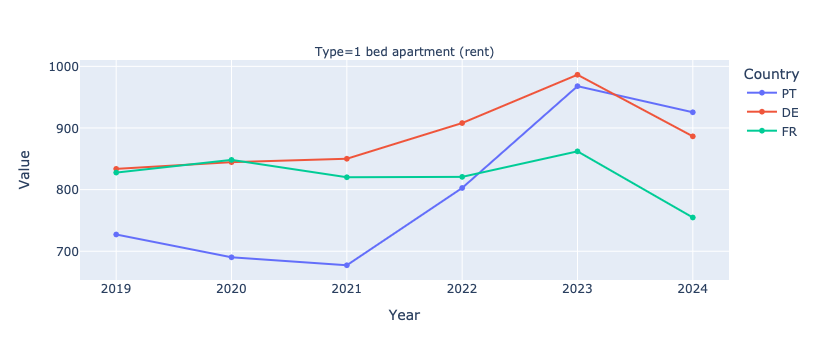

In [231]:
fig = px.line(
    one_bed_apt_melted, 
    x="Year", 
    y="Value",
    color="Country",       # Color lines by Country
    line_group="Country",  # Group lines by Country
    facet_col="Type",      # Create a separate subplot for each apartment Type
    markers=True           # Add markers to each point
)

fig.show()